In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset

## estimate parameters from loans

In [2]:
data_dir = '/data/workspace_files/'
nft_data_path = data_dir+'NFT+Updated+data.csv'
whitelist_path = data_dir+'Whitelist - Sheet1.csv'

nft_data = pd.read_csv(nft_data_path, index_col=0)
whitelist = pd.read_csv(whitelist_path)

In [3]:
nft_data

,loanStartTime,loanDueTime,asset_contract,item_no,status,loanPrincipalAmount,amountPaidToLender,APR,loanDuration,lender,borrower,assetCategory,loanERC20Denomination,slug,starting_valuation,ending_valuation,LTV
1063,2021-09-02 01:24:42,2021-10-02 01:24:42,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,2232,repaid,10.000,11.520000,194.67,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xed50b7114a69c69cbbb9a38d234d1514fd952413,VeeFriends,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,11.5555,14.590,0.865389
1076,2021-09-02 18:36:45,2021-10-02 18:36:45,0x905b180268f2773022e1a10e204b0858b2e60dcf,1466040470,repaid,5.000,5.380000,97.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xe74ca58ef724b94fac7f2e09e2e48536a5c1ad03,Pulsquares,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,22.0000,8.500,0.227273
1086,2021-09-03 09:55:36,2021-09-10 09:55:36,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,3466,repaid,5.500,5.580165,80.00,7.0,0x88abb547673b28b89ac72b7c0dc1627d3f12b4d0,0x3f015b37cd324d3cbaaa075a75f8f0a9afeb04e1,VeeFriends,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,13.8900,13.890,0.395968
1110,2021-09-09 12:20:39,2021-10-09 12:20:39,0x905b180268f2773022e1a10e204b0858b2e60dcf,3691774315,repaid,5.475,6.045000,133.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xe74ca58ef724b94fac7f2e09e2e48536a5c1ad03,Pulsquares,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,16.8500,7.850,0.324926
1125,2021-09-14 13:45:22,2021-09-21 13:45:22,0x85f740958906b317de6ed79663012859067e745b,2171,liquidated,0.200,0.000000,0.00,7.0,0x1b02eab42a1004a6210428c5740fcf0cbcb5ca6e,0x752184a2069c35f03d0216ba806013693740b285,TheWickedCraniums,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,thewickedcraniums,0.2500,0.350,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,2023-01-16 15:14:23,2023-02-15 15:14:23,0x80336ad7a747236ef41f47ed2c7641828a480baa,1922,escrow,0.800,0.000000,79.00,30.0,0x5b20dce335d131c6de0cc11b481ace2aade788df,0x77182f4f182432945b520e054d3a7b5ab2a83e22,Chimpers,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,chimpersnft,1.6950,1.695,0.471976
24862,2023-01-16 15:46:11,2023-01-30 15:46:11,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,8800,escrow,9.000,0.000000,50.00,14.0,0x503c284ca2aee317426642a697eeb09f1feccf41,0x031df53cb282498278f9974749642869f3ee2ba3,CLONE X - X TAKASHI MURAKAMI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,clonex,5.7500,5.750,1.565217
24863,2023-01-16 15:54:11,2023-02-15 15:54:11,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,3989,escrow,4.511,0.000000,38.00,30.0,0xf3bbcda1c73281e461d2a3388ffa03807b3f98a2,0x77182f4f182432945b520e054d3a7b5ab2a83e22,CLONE X - X TAKASHI MURAKAMI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,clonex,5.7500,5.750,0.784522
24864,2023-01-16 16:36:11,2023-02-15 16:36:11,0xccc441ac31f02cd96c153db6fd5fe0a2f4e6a68d,2440,escrow,1.700,0.000000,35.00,30.0,0xa76b00d8fe77807edc51a87dbceabb623701d9d7,0x50fec23ffb143fd9b71ed11337b2b04c1a35f5d5,FLUF World,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,fluf,3.0900,3.090,0.550162


In [4]:
nft_data.columns

Index(['loanStartTime', 'loanDueTime', 'asset_contract', 'item_no', 'status',
       'loanPrincipalAmount', 'amountPaidToLender', 'APR', 'loanDuration',
       'lender', 'borrower', 'assetCategory', 'loanERC20Denomination', 'slug',
       'starting_valuation', 'ending_valuation', 'LTV'],
      dtype='object')

## unique identifier

In [5]:
counts = nft_data.groupby(['asset_contract', 'item_no', 'lender', 'loanStartTime', 'loanDueTime'])['loanStartTime'].count()
print(counts[counts!=1].count())
counts[counts!=1]

8


asset_contract item_no lender loanStartTime loanDueTime 
0x60e4d786628fea6478f785a6d7e704777c86a7c6 15518 0x818ec19ebe023b4774799fdb39f0b20af39571fe 2023-01-11 14:01:47 2023-01-18 14:01:47 2
 25726 0x0aff497bd016000185b1c8302fa98a88ff4a4178 2022-03-24 20:03:40 2022-04-07 20:03:40 2
0x6e9da81ce622fb65abf6a8d8040e460ff2543add 449 0xa728ada3eb99f9fe120c2014d2095784bd7f6cd4 2022-12-30 13:01:59 2023-01-29 13:01:59 2
 465 0xa728ada3eb99f9fe120c2014d2095784bd7f6cd4 2022-12-30 13:00:47 2023-01-29 13:00:47 2
0xbce3781ae7ca1a5e050bd9c4c77369867ebc307e 8177 0x5d6cacdea4d2c64ae9f966e4e2ff027e82890701 2022-09-24 11:56:23 2022-10-08 11:56:23 2
 8371 0x5d6cacdea4d2c64ae9f966e4e2ff027e82890701 2022-09-02 16:07:22 2022-09-16 16:07:22 2
 9853 0x5d6cacdea4d2c64ae9f966e4e2ff027e82890701 2022-09-24 11:54:47 2022-10-08 11:54:47 2
0xe785e82358879f061bc3dcac6f0444462d4b5330 9045 0x9cd074f0192bb2a477da3271ba03db4fc5cd38c7 2023-01-04 21:13:47 2023-02-03 21:13:47 2
Name: loanStartTime, dtype: int64

In [6]:
nft_data[(nft_data['asset_contract']=='0x34d85c9cdeb23fa97cb08333b511ac86e1c4e258') & \
         (nft_data['loanStartTime']=='2022-05-13 03:40:54') & \
         (nft_data['lender'] == '0x3b2b81721fa6c5be3bb372b8bb334d78599c51c5')]


,loanStartTime,loanDueTime,asset_contract,item_no,status,loanPrincipalAmount,amountPaidToLender,APR,loanDuration,lender,borrower,assetCategory,loanERC20Denomination,slug,starting_valuation,ending_valuation,LTV
8722,2022-05-13 03:40:54,2022-06-12 03:40:54,0x34d85c9cdeb23fa97cb08333b511ac86e1c4e258,77033,repaid,1.4,1.439354,36.0,30.0,0x3b2b81721fa6c5be3bb372b8bb334d78599c51c5,0x4d4d5236d1160698e21b44fcf6b35797081c8fdf,Otherdeed for Otherside,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,otherdeed,2.9274,2.1312,0.47824
8723,2022-05-13 03:40:54,2022-06-12 03:40:54,0x34d85c9cdeb23fa97cb08333b511ac86e1c4e258,82136,repaid,1.4,1.439354,36.0,30.0,0x3b2b81721fa6c5be3bb372b8bb334d78599c51c5,0x4d4d5236d1160698e21b44fcf6b35797081c8fdf,Otherdeed for Otherside,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,otherdeed,2.9274,2.1312,0.47824


In [7]:
# use 'asset_contract', 'item_no', 'lender', 'loanStartTime', 'loanDueTime' as key, dedup data:
nft_data_processed = nft_data.drop_duplicates(['asset_contract', 'item_no', 'lender', 'loanStartTime', 'loanDueTime'])
print(nft_data_processed.count())
nft_data_processed

loanStartTime            12750
loanDueTime              12750
asset_contract           12750
item_no                  12750
status                   12750
loanPrincipalAmount      12750
amountPaidToLender       12750
APR                      12750
loanDuration             12750
lender                   12750
borrower                 12750
assetCategory            12749
loanERC20Denomination    12750
slug                     12750
starting_valuation       12750
ending_valuation         12750
LTV                      12750
dtype: int64


,loanStartTime,loanDueTime,asset_contract,item_no,status,loanPrincipalAmount,amountPaidToLender,APR,loanDuration,lender,borrower,assetCategory,loanERC20Denomination,slug,starting_valuation,ending_valuation,LTV
1063,2021-09-02 01:24:42,2021-10-02 01:24:42,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,2232,repaid,10.000,11.520000,194.67,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xed50b7114a69c69cbbb9a38d234d1514fd952413,VeeFriends,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,11.5555,14.590,0.865389
1076,2021-09-02 18:36:45,2021-10-02 18:36:45,0x905b180268f2773022e1a10e204b0858b2e60dcf,1466040470,repaid,5.000,5.380000,97.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xe74ca58ef724b94fac7f2e09e2e48536a5c1ad03,Pulsquares,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,22.0000,8.500,0.227273
1086,2021-09-03 09:55:36,2021-09-10 09:55:36,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,3466,repaid,5.500,5.580165,80.00,7.0,0x88abb547673b28b89ac72b7c0dc1627d3f12b4d0,0x3f015b37cd324d3cbaaa075a75f8f0a9afeb04e1,VeeFriends,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,13.8900,13.890,0.395968
1110,2021-09-09 12:20:39,2021-10-09 12:20:39,0x905b180268f2773022e1a10e204b0858b2e60dcf,3691774315,repaid,5.475,6.045000,133.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xe74ca58ef724b94fac7f2e09e2e48536a5c1ad03,Pulsquares,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,16.8500,7.850,0.324926
1125,2021-09-14 13:45:22,2021-09-21 13:45:22,0x85f740958906b317de6ed79663012859067e745b,2171,liquidated,0.200,0.000000,0.00,7.0,0x1b02eab42a1004a6210428c5740fcf0cbcb5ca6e,0x752184a2069c35f03d0216ba806013693740b285,TheWickedCraniums,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,thewickedcraniums,0.2500,0.350,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,2023-01-16 15:14:23,2023-02-15 15:14:23,0x80336ad7a747236ef41f47ed2c7641828a480baa,1922,escrow,0.800,0.000000,79.00,30.0,0x5b20dce335d131c6de0cc11b481ace2aade788df,0x77182f4f182432945b520e054d3a7b5ab2a83e22,Chimpers,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,chimpersnft,1.6950,1.695,0.471976
24862,2023-01-16 15:46:11,2023-01-30 15:46:11,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,8800,escrow,9.000,0.000000,50.00,14.0,0x503c284ca2aee317426642a697eeb09f1feccf41,0x031df53cb282498278f9974749642869f3ee2ba3,CLONE X - X TAKASHI MURAKAMI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,clonex,5.7500,5.750,1.565217
24863,2023-01-16 15:54:11,2023-02-15 15:54:11,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,3989,escrow,4.511,0.000000,38.00,30.0,0xf3bbcda1c73281e461d2a3388ffa03807b3f98a2,0x77182f4f182432945b520e054d3a7b5ab2a83e22,CLONE X - X TAKASHI MURAKAMI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,clonex,5.7500,5.750,0.784522
24864,2023-01-16 16:36:11,2023-02-15 16:36:11,0xccc441ac31f02cd96c153db6fd5fe0a2f4e6a68d,2440,escrow,1.700,0.000000,35.00,30.0,0xa76b00d8fe77807edc51a87dbceabb623701d9d7,0x50fec23ffb143fd9b71ed11337b2b04c1a35f5d5,FLUF World,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,fluf,3.0900,3.090,0.550162


## average dur of loan -> pool life

In [8]:
nft_data_processed['loanDueDate'] = pd.to_datetime(pd.to_datetime(nft_data_processed['loanDueTime']).dt.date)
nft_data_processed['loanStartDate'] = pd.to_datetime(pd.to_datetime(nft_data_processed['loanStartTime']).dt.date)
nft_data_processed['maturity'] = (nft_data_processed['loanDueDate'] - nft_data_processed['loanStartDate']).dt.days
nft_data_processed['maturity'].describe()

<ipython-input-8-2c53c7692fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_data_processed['loanDueDate'] = pd.to_datetime(pd.to_datetime(nft_data_processed['loanDueTime']).dt.date)
<ipython-input-8-2c53c7692fa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_data_processed['loanStartDate'] = pd.to_datetime(pd.to_datetime(nft_data_processed['loanStartTime']).dt.date)
<ipython-input-8-2c53c7692fa8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

count 12750.000000
mean 30.438118
std 21.542656
min 0.000000
25% 14.000000
50% 30.000000
75% 30.000000
max 180.000000
Name: maturity, dtype: float64

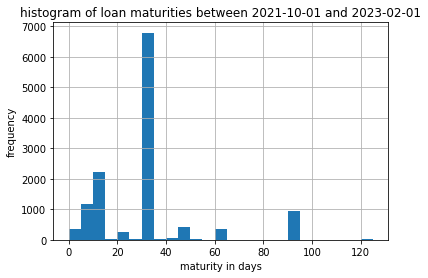

In [9]:
nft_data_processed['maturity'].hist(bins=25, range=(0,125))
plt.title('histogram of loan maturities between 2021-10-01 and 2023-02-01')
plt.ylabel('frequency')
plt.xlabel('maturity in days')
plt.savefig('histogram of loan maturities between 2021-10-01 and 2023-02-01.png')

In [10]:
nft_data_processed

,loanStartTime,loanDueTime,asset_contract,item_no,status,loanPrincipalAmount,amountPaidToLender,APR,loanDuration,lender,borrower,assetCategory,loanERC20Denomination,slug,starting_valuation,ending_valuation,LTV,loanDueDate,loanStartDate,maturity
1063,2021-09-02 01:24:42,2021-10-02 01:24:42,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,2232,repaid,10.000,11.520000,194.67,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xed50b7114a69c69cbbb9a38d234d1514fd952413,VeeFriends,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,11.5555,14.590,0.865389,2021-10-02,2021-09-02,30
1076,2021-09-02 18:36:45,2021-10-02 18:36:45,0x905b180268f2773022e1a10e204b0858b2e60dcf,1466040470,repaid,5.000,5.380000,97.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xe74ca58ef724b94fac7f2e09e2e48536a5c1ad03,Pulsquares,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,22.0000,8.500,0.227273,2021-10-02,2021-09-02,30
1086,2021-09-03 09:55:36,2021-09-10 09:55:36,0xa3aee8bce55beea1951ef834b99f3ac60d1abeeb,3466,repaid,5.500,5.580165,80.00,7.0,0x88abb547673b28b89ac72b7c0dc1627d3f12b4d0,0x3f015b37cd324d3cbaaa075a75f8f0a9afeb04e1,VeeFriends,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,veefriends,13.8900,13.890,0.395968,2021-09-10,2021-09-03,7
1110,2021-09-09 12:20:39,2021-10-09 12:20:39,0x905b180268f2773022e1a10e204b0858b2e60dcf,3691774315,repaid,5.475,6.045000,133.33,30.0,0xf542443cd8f4b18578aa7f2b647676a9c41914b3,0xe74ca58ef724b94fac7f2e09e2e48536a5c1ad03,Pulsquares,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,pulsquares,16.8500,7.850,0.324926,2021-10-09,2021-09-09,30
1125,2021-09-14 13:45:22,2021-09-21 13:45:22,0x85f740958906b317de6ed79663012859067e745b,2171,liquidated,0.200,0.000000,0.00,7.0,0x1b02eab42a1004a6210428c5740fcf0cbcb5ca6e,0x752184a2069c35f03d0216ba806013693740b285,TheWickedCraniums,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,thewickedcraniums,0.2500,0.350,0.800000,2021-09-21,2021-09-14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,2023-01-16 15:14:23,2023-02-15 15:14:23,0x80336ad7a747236ef41f47ed2c7641828a480baa,1922,escrow,0.800,0.000000,79.00,30.0,0x5b20dce335d131c6de0cc11b481ace2aade788df,0x77182f4f182432945b520e054d3a7b5ab2a83e22,Chimpers,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,chimpersnft,1.6950,1.695,0.471976,2023-02-15,2023-01-16,30
24862,2023-01-16 15:46:11,2023-01-30 15:46:11,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,8800,escrow,9.000,0.000000,50.00,14.0,0x503c284ca2aee317426642a697eeb09f1feccf41,0x031df53cb282498278f9974749642869f3ee2ba3,CLONE X - X TAKASHI MURAKAMI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,clonex,5.7500,5.750,1.565217,2023-01-30,2023-01-16,14
24863,2023-01-16 15:54:11,2023-02-15 15:54:11,0x49cf6f5d44e70224e2e23fdcdd2c053f30ada28b,3989,escrow,4.511,0.000000,38.00,30.0,0xf3bbcda1c73281e461d2a3388ffa03807b3f98a2,0x77182f4f182432945b520e054d3a7b5ab2a83e22,CLONE X - X TAKASHI MURAKAMI,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,clonex,5.7500,5.750,0.784522,2023-02-15,2023-01-16,30
24864,2023-01-16 16:36:11,2023-02-15 16:36:11,0xccc441ac31f02cd96c153db6fd5fe0a2f4e6a68d,2440,escrow,1.700,0.000000,35.00,30.0,0xa76b00d8fe77807edc51a87dbceabb623701d9d7,0x50fec23ffb143fd9b71ed11337b2b04c1a35f5d5,FLUF World,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,fluf,3.0900,3.090,0.550162,2023-02-15,2023-01-16,30


In [11]:
# let's use 30 days as our pool duration, pay every 5 days
def get_first_of_month(date):
    return datetime(date.year, date.month, 1)

# use maturity here since maturity rounded the dates already
nft_data_processed['bucket'] = nft_data_processed['loanDueDate'].dt.to_period('M').dt.to_timestamp()
nft_data_processed['first_of_due_month'] = nft_data_processed['loanDueDate'].apply(get_first_of_month)
nft_data_clean = nft_data_processed[(nft_data_processed.maturity <= 30) & \
                                    (nft_data_processed.loanStartDate <= nft_data_processed['first_of_due_month']) & \
                                    (nft_data_processed.loanDueDate > nft_data_processed['first_of_due_month'])
                                   ]
print(nft_data_clean['bucket'])

1063    2021-10-01
1076    2021-10-01
1110    2021-10-01
1139    2021-10-01
1169    2021-10-01
           ...    
24859   2023-02-01
24860   2023-02-01
24863   2023-02-01
24864   2023-02-01
24866   2023-02-01
Name: bucket, Length: 7958, dtype: datetime64[ns]


<ipython-input-11-fe252914aef8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_data_processed['bucket'] = nft_data_processed['loanDueDate'].dt.to_period('M').dt.to_timestamp()
<ipython-input-11-fe252914aef8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_data_processed['first_of_due_month'] = nft_data_processed['loanDueDate'].apply(get_first_of_month)


In [12]:
nft_data_clean.count()

loanStartTime 7958
loanDueTime 7958
asset_contract 7958
item_no 7958
status 7958
loanPrincipalAmount 7958
amountPaidToLender 7958
APR 7958
loanDuration 7958
lender 7958
borrower 7958
assetCategory 7957
loanERC20Denomination 7958
slug 7958
starting_valuation 7958
ending_valuation 7958
LTV 7958
loanDueDate 7958
loanStartDate 7958
maturity 7958
bucket 7958
first_of_due_month 7958
dtype: int64

In [13]:
nft_data_clean['loan_amount_due'] = nft_data_clean['loanPrincipalAmount'] * \
                                    (1+nft_data_clean['APR']/100 * nft_data_clean['loanDuration']/360)

nft_data_clean[['loanDuration', 'loanPrincipalAmount', 'loan_amount_due', 'amountPaidToLender']]

# assume recovery of 0.75
nft_data_clean['loan_repayment'] = nft_data_clean['amountPaidToLender']
nft_data_clean.loc[nft_data_clean['amountPaidToLender']==0.0, 'loan_repayment'] = nft_data_clean.loc[nft_data_clean['amountPaidToLender']==0.0]['ending_valuation'] * 0.75

nft_data_clean.loc[nft_data_clean['amountPaidToLender']==0.0]['loan_repayment']

<ipython-input-13-e3b9ab2ebd6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_data_clean['loan_amount_due'] = nft_data_clean['loanPrincipalAmount'] * \
<ipython-input-13-e3b9ab2ebd6a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nft_data_clean['loan_repayment'] = nft_data_clean['amountPaidToLender']
/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

1277 6.66000
1308 0.67500
1325 0.60750
1326 0.60750
1334 0.78750
 ... 
24859 0.49950
24860 1.27125
24863 4.31250
24864 2.31750
24866 0.68250
Name: loan_repayment, Length: 1275, dtype: float64

## principal paid over time -> for pool amount
## repayment -> wacc

In [14]:

def population_check(nft_data_clean):
    # every 30 days, how many/how much loans are maturing; default % in $ and in count
    # USD face value for reference
    monthly_df = pd.DataFrame()
    monthly_df['apr'] = nft_data_clean.groupby('bucket')['APR'].mean()
    monthly_df['loan_amt'] = nft_data_clean.groupby('bucket')['loanPrincipalAmount'].sum()
    monthly_df['loan_cnt'] = nft_data_clean.groupby('bucket')['loanPrincipalAmount'].count()
    monthly_df['repaid_loan_amt_pct'] = nft_data_clean[nft_data_clean['status']=='repaid'].groupby('bucket')\
                                 ['loanPrincipalAmount'].sum() \
                                / monthly_df['loan_amt'] 
    monthly_df['repaid_loan_cnt_pct'] = nft_data_clean[nft_data_clean['status']=='repaid'].groupby('bucket')\
                                 ['loanPrincipalAmount'].count() \
                                / monthly_df['loan_cnt']
    
    ## principal+interest paid over time -> for wac
    monthly_df['loan_amt_w_intrst'] = nft_data_clean.groupby('bucket')['loan_amount_due'].sum()
    monthly_df['repaid_loan_amt_w_intrst'] = nft_data_clean.groupby('bucket')['amountPaidToLender'].sum()
    monthly_df['repaid_loan_amt_w_intrst_pct'] = monthly_df['repaid_loan_amt_w_intrst'] / monthly_df['loan_amt_w_intrst']
    monthly_df['repaid_loan_amt_wo_intrst_pct'] = monthly_df['repaid_loan_amt_w_intrst'] / monthly_df['loan_amt']
    monthly_df['repaid_w_rcvr_pct'] = nft_data_clean.groupby('bucket')['loan_repayment'].sum() / monthly_df['loan_amt']

    ## average aggregated LTV at beginning and end:
    monthly_df['agg_ltv_start'] = monthly_df['loan_amt'] / nft_data_clean.groupby('bucket')['starting_valuation'].sum()
    monthly_df['agg_ltv_end'] = monthly_df['loan_amt'] / nft_data_clean.groupby('bucket')['ending_valuation'].sum()
    
    # denominations check:
    print(f"denominations: {nft_data_clean['loanERC20Denomination'].unique()}") # only 1 denomination, good
    return monthly_df


denominations: ['0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2']


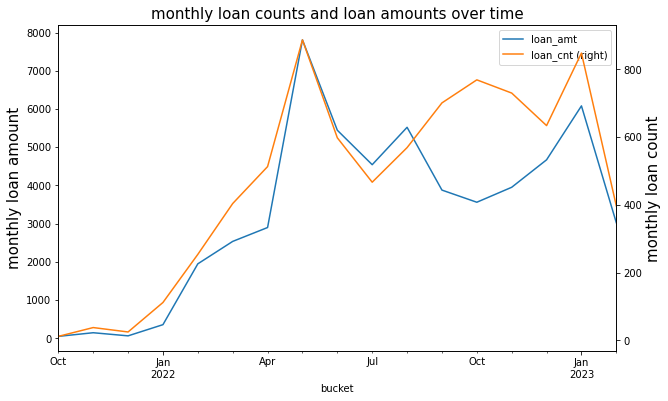

In [31]:
pop = population_check(nft_data_clean)
a = pop[['loan_amt', 'loan_cnt']].plot(secondary_y=['loan_cnt'], figsize=(10,6))
a.set_ylabel('monthly loan amount', fontsize=15)
plt.ylabel('monthly loan count', fontsize=15)
plt.xlabel('time', fontsize=15)
plt.title('monthly loan counts and loan amounts over time', fontsize=15)
plt.savefig('monthly loan counts and loan amounts over time.png')

In [24]:
a

<AxesSubplot:xlabel='bucket', ylabel='monthly loan amount'>

bucket
2022-10-01    55.695150
2022-11-01    54.206082
2022-12-01    60.763927
2023-01-01    54.419988
2023-02-01    49.024358
Name: apr, dtype: float64


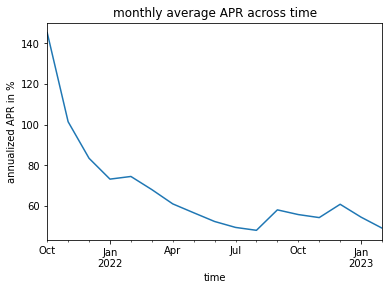

In [16]:
pop['apr'].plot()
plt.title('monthly average APR across time')
plt.ylabel('annualized APR in %')
plt.xlabel('time')
plt.savefig('monthly average APR across time.png')
print(pop['apr'].tail())

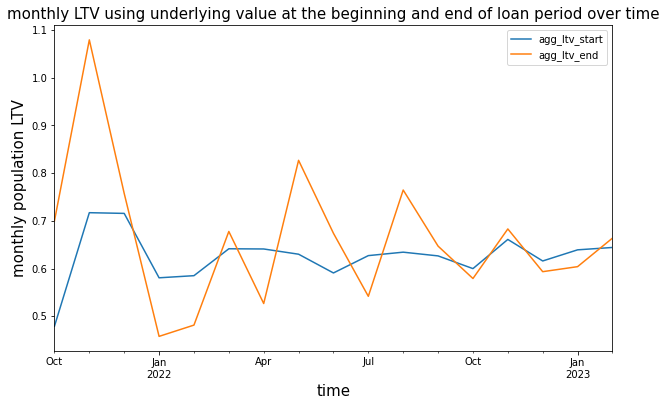

In [36]:
a = pop[['agg_ltv_start', 'agg_ltv_end']].plot(figsize=(10,6))
a.set_ylabel(ylabel='monthly population LTV', fontsize=15)
plt.xlabel('time', fontsize=15)
plt.title('monthly LTV using underlying value at the beginning and end of loan period over time', fontsize=15)
plt.savefig('monthly population LTV using underlying value at the beginning and end of loan period over time.png')

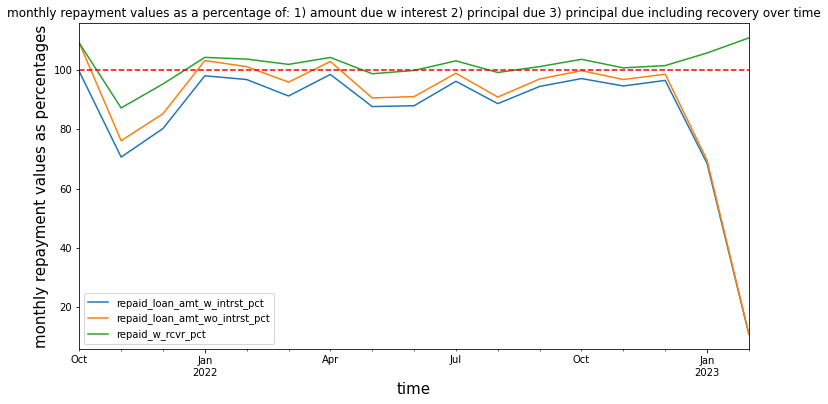

In [35]:
(pop[['repaid_loan_amt_w_intrst_pct', 'repaid_loan_amt_wo_intrst_pct', 'repaid_w_rcvr_pct']]*100).plot(figsize=(12,6))
plt.ylabel(ylabel='monthly repayment values as percentages', fontsize=15)
plt.xlabel('time', fontsize=15)
plt.title('monthly repayment values as a percentage of: 1) amount due w interest 2) principal due 3) principal due including recovery over time', fontsize=12)
plt.savefig('monthly repayment values as a percentage of: 1) amount due w interest 2) principal due 3) principal due including recovery over time.png')
plt.axhline(y=100, color='r', linestyle = 'dashed')

denominations: ['0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2']


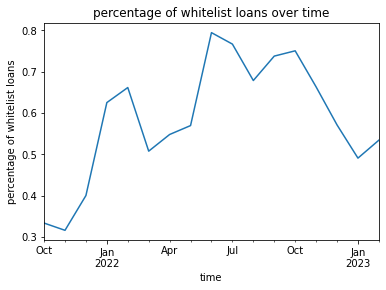

In [19]:
## nft repayment differs based on whitelist; whitelist safer; remove?
nft_data_whitelist = nft_data_clean[nft_data_clean['slug'].isin(whitelist['slug'].tolist())]
pop_whitelist = population_check(nft_data_whitelist)
(nft_data_whitelist.groupby(['bucket']).count()/nft_data_clean.groupby(['bucket']).count())['asset_contract'].plot()
plt.title('percentage of whitelist loans over time')
plt.ylabel('percentage of whitelist loans')
plt.xlabel('time')
plt.savefig('percentage of whitelist loans over time.png')

In [20]:
# whitelist and low LTV
# nft_data_whitelist_low_ltv = nft_data_clean[(nft_data_clean['slug'].isin(whitelist['slug'].tolist())) & (nft_data_clean['LTV'] <= 1 )]
# pop_whitelist_low_ltv = population_check(nft_data_whitelist_low_ltv)
# pop_whitelist_low_ltv#[['loan_amt', 'loan_cnt', 'loan_amt_pct', 'loan_cnt_pct', 'repaid_w_intrst_pct', 'wavg_ltv_start', 'wavg_ltv_end']]


In [21]:
# nft_data_whitelist_low_ltv

## realized

In [22]:
# inputs: population PER MONTH, target_principal
# no_samples (samples to take), cutoff: if number of loans too low to be diversifying
# output: list of pools

def sample_pools(loans, target_principal, no_samples, seed=125, cutoff=35):
    samples=[]
    np.random.seed(seed)
    for i in range(no_samples):
        reordered = loans.sample(n=loans.shape[0])
        selected = reordered[reordered['loanPrincipalAmount'].cumsum() >= target_principal]
        if selected.index.shape[0] < 1:
            continue
        
        lim = selected.index[0]
        # make sure we have over 35 loans in pool
        if reordered.loc[:lim, :].shape[0] < cutoff:
            continue
            
        samples.append(reordered.loc[:lim, :])
    return samples


## price with historical loans

In [23]:

def calculate_pool_cf(pool, recovery=0.75):
    """
    Split up historical pools cash flows into interest and principal (principal includes recovered defaulted loans),
    as well as the time series of remaining balances.
    Output: on each of the t days, how much is principal, how much is interest from this pool

    Parameters
    ----------
    pool         -- actual loans that occurred in pool
    recovery     -- recovery rate after default
    """

    pool_cp = pool.copy()

    # get interest vs principal payments
    # recovery value:
    pool_cp['recovery_value'] = pool_cp['ending_valuation'] * recovery

    # repaid principal:
    defaulted = pool_cp.loc[pool_cp['amountPaidToLender']==0.0, :].index
    pool_cp['repaid_principal'] = pool_cp['loanPrincipalAmount']
    pool_cp.loc[pool_cp['amountPaidToLender']==0.0, 'repaid_principal'] = np.minimum(pool_cp.loc[defaulted]['ending_valuation'] * recovery, pool_cp.loc[defaulted]['loanPrincipalAmount'])

    # recovery residual:
    pool_cp['recovery_residual'] = 0
    pool_cp.loc[pool_cp['amountPaidToLender']==0.0, 'recovery_residual'] = pool_cp.loc[defaulted]['recovery_value'] - pool_cp.loc[defaulted]['repaid_principal']
    
    # repaid interest
    pool_cp['interest'] = np.maximum(0, pool_cp['amountPaidToLender'] - pool_cp['repaid_principal'])

    pool_w_dates = pool_cp.groupby(['loanDueDate'])[['amountPaidToLender', 'loanPrincipalAmount', 'loan_repayment', 'repaid_principal', 'interest', 'recovery_residual']].sum()

    # get balances: which loans have been accounted for
    pool_w_dates['balance'] = pool_w_dates['loanPrincipalAmount'].sum() - pool_w_dates['loanPrincipalAmount'].cumsum()

    tmp = pd.DataFrame({'balance': pool_w_dates['loanPrincipalAmount'].sum(), 'loanPrincipalAmount': 0, 'loan_repayment':0, 'repaid_principal':0, 'interest':0, 'recovery_residual': 0}, index=[pool_w_dates.index.min()+DateOffset(days=-1)])

    # add zero-th day of balance
    pool_w_dates.loc[pool_w_dates.index.min()+DateOffset(days=-1)] = tmp.loc[pool_w_dates.index.min()+DateOffset(days=-1)]
    pool_w_dates = pool_w_dates.sort_index()
    
    return pool_w_dates


def calc_io_po(pool_w_dates):
    """
    Calculate the price of IO and PO ffrom daily cashflows.

    Parameters
    ----------
    pool_w_dates -- dated cashflows of pool
    """    

    return {'face_value': pool_w_dates['loanPrincipalAmount'].sum(),
            'PO': pool_w_dates['repaid_principal'].sum(),\
            'IO': pool_w_dates['interest'].sum(), \
            'residual': pool_w_dates['recovery_residual'].sum(), \
            'bucket': pool_w_dates.index[0].to_period('M').to_timestamp()\
           }

def calc_tranches_by_principal(loan_pool, tranche_principals=None, tranche_aprs=None, dur=34):
    """
    Calculate the price of tranches from daily cashflows.

    Parameters
    ----------
    pool_w_dates    -- loans in pool, no need to flow by date
    tranche_cutoffs -- principal values of tranches, can be predetermined by user
    interests       -- desired interests for each tranche; can be predetermined by user

    returns: {tranche_1: price, ..., residual: price}
    """
    remaining = loan_pool['loan_repayment'].sum()

    no_tranches = len(tranche_principals) if tranche_principals else len(tranche_aprs)

    # initialize tranche_principals and aprs
    tranche_principals = list(tranche_principals if tranche_principals \
                    else np.diff(np.insert([loan_pool['loanPrincipalAmount'].sum() * (i+1)/no_tranches for i in range(no_tranches)], 0, 0)))
    tranche_aprs = list(tranche_aprs if tranche_aprs \
              else [loan_pool['APR'].quantile((i+1)/(no_tranches+1)/2) for i in range(no_tranches)])

    # initialize residual tranche
    tranche_principals.append(0)
    tranche_aprs.append(0)

    res = dict() #{'principal': tranche_principals, 'APR': tranche_aprs, 'valuation': [], 'no_default_valuation': []}

    for i in range(no_tranches):
        res[f'principal_{i+1}'] = tranche_principals[i]
        res[f'apr_{i+1}'] = tranche_aprs[i]

        no_default_val = tranche_principals[i] * (1+tranche_aprs[i]/100 * dur/360)
        val = np.minimum(remaining, no_default_val)

        res[f'valuation_{i+1}'] = val
        res[f'no_default_val_{i+1}'] = no_default_val
        remaining -= val

    res['valuation_residual'] = remaining
    res['no_default_valuation_residual'] = 0


    # now normalize everything to $1 unit:
    for i in range(no_tranches):
        res[f'valuation_{i+1}/face_value'] = res[f'valuation_{i+1}'] / res[f'principal_{i+1}']

    # not necessarily useful; only for completeness
    res['valuation_residual/face_value'] = res['valuation_residual'] / loan_pool['loanPrincipalAmount'].sum()

    res['bucket'] = loan_pool['bucket'].iloc[0]

    return res


## Stability Evaluation and Confidence Interval using historical methods

In [24]:
nft_data_whitelist.groupby(['bucket']).count()

,loanStartTime,loanDueTime,asset_contract,item_no,status,loanPrincipalAmount,amountPaidToLender,APR,loanDuration,lender,...,slug,starting_valuation,ending_valuation,LTV,loanDueDate,loanStartDate,maturity,first_of_due_month,loan_amount_due,loan_repayment
bucket,,,,,,,,,,,,,,,,,,,,,
2021-10-01,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2021-11-01,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
2021-12-01,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
2022-01-01,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
2022-02-01,168,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
2022-03-01,205,205,205,205,205,205,205,205,205,205,...,205,205,205,205,205,205,205,205,205,205
2022-04-01,281,281,281,281,281,281,281,281,281,281,...,281,281,281,281,281,281,281,281,281,281
2022-05-01,505,505,505,505,505,505,505,505,505,505,...,505,505,505,505,505,505,505,505,505,505
2022-06-01,475,475,475,475,475,475,475,475,475,475,...,475,475,475,475,475,475,475,475,475,475


In [25]:
nft_data_clean.count()

loanStartTime 7958
loanDueTime 7958
asset_contract 7958
item_no 7958
status 7958
loanPrincipalAmount 7958
amountPaidToLender 7958
APR 7958
loanDuration 7958
lender 7958
borrower 7958
assetCategory 7957
loanERC20Denomination 7958
slug 7958
starting_valuation 7958
ending_valuation 7958
LTV 7958
loanDueDate 7958
loanStartDate 7958
maturity 7958
bucket 7958
first_of_due_month 7958
loan_amount_due 7958
loan_repayment 7958
dtype: int64

In [26]:
target_principal=200
# no_samples=200 # dynamically decide number of samples to take to avoid oversampling
seed=125
cutoff=30

buckets = nft_data_clean['bucket'].unique()
print(buckets)
sample_pool = []
for bucket in buckets:
    bucket_data = nft_data_clean[nft_data_clean['bucket']==bucket]
    cur = sample_pools(bucket_data,
             target_principal=target_principal, no_samples=int(np.ceil(bucket_data.shape[0]/3)), seed=seed, cutoff=cutoff)
    if cur:
        sample_pool.extend(cur)

['2021-10-01T00:00:00.000000000' '2021-11-01T00:00:00.000000000'
 '2021-12-01T00:00:00.000000000' '2022-01-01T00:00:00.000000000'
 '2022-02-01T00:00:00.000000000' '2022-03-01T00:00:00.000000000'
 '2022-04-01T00:00:00.000000000' '2022-05-01T00:00:00.000000000'
 '2022-06-01T00:00:00.000000000' '2022-07-01T00:00:00.000000000'
 '2022-08-01T00:00:00.000000000' '2022-09-01T00:00:00.000000000'
 '2022-10-01T00:00:00.000000000' '2022-11-01T00:00:00.000000000'
 '2022-12-01T00:00:00.000000000' '2023-01-01T00:00:00.000000000'
 '2023-02-01T00:00:00.000000000']


In [27]:
print(nft_data_clean['bucket'])

1063    2021-10-01
1076    2021-10-01
1110    2021-10-01
1139    2021-10-01
1169    2021-10-01
           ...    
24859   2023-02-01
24860   2023-02-01
24863   2023-02-01
24864   2023-02-01
24866   2023-02-01
Name: bucket, Length: 7958, dtype: datetime64[ns]


In [28]:
# make sure we have a good number of loans and we cover a good number of dates
print(len(sample_pool))
print('available loans:')
print(pd.Series([pool['bucket'].iloc[0] for pool in sample_pool]).unique())

1373
available loans:
['2022-01-01T00:00:00.000000000' '2022-02-01T00:00:00.000000000'
 '2022-03-01T00:00:00.000000000' '2022-04-01T00:00:00.000000000'
 '2022-05-01T00:00:00.000000000' '2022-06-01T00:00:00.000000000'
 '2022-07-01T00:00:00.000000000' '2022-08-01T00:00:00.000000000'
 '2022-09-01T00:00:00.000000000' '2022-10-01T00:00:00.000000000'
 '2022-11-01T00:00:00.000000000' '2022-12-01T00:00:00.000000000'
 '2023-01-01T00:00:00.000000000' '2023-02-01T00:00:00.000000000']


In [29]:
# make sure the samplings are actually different among each month
print(sample_pool[0].head()['bucket'])
print(sample_pool[1].head()['bucket'])
print(sample_pool[2].head()['bucket'])

2596   2022-01-01
2279   2022-01-01
2106   2022-01-01
2420   2022-01-01
2475   2022-01-01
Name: bucket, dtype: datetime64[ns]
2566   2022-01-01
2270   2022-01-01
2205   2022-01-01
2535   2022-01-01
2286   2022-01-01
Name: bucket, dtype: datetime64[ns]
2562   2022-01-01
2566   2022-01-01
2511   2022-01-01
2310   2022-01-01
2556   2022-01-01
Name: bucket, dtype: datetime64[ns]


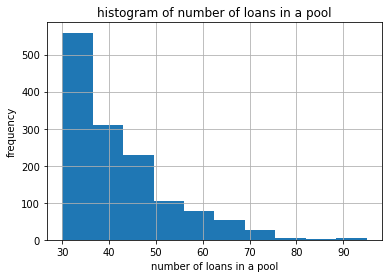

In [30]:
pd.Series([i.shape[0] for i in sample_pool]).hist()
plt.title('histogram of number of loans in a pool')
plt.ylabel('frequency')
plt.xlabel('number of loans in a pool')
plt.savefig("histogram of number of loans in a pool.png")

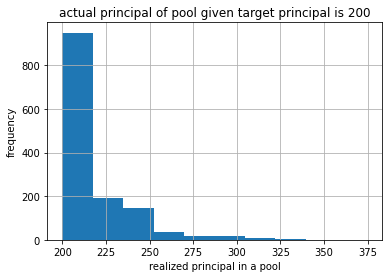

In [31]:
pd.Series([i['loanPrincipalAmount'].sum() for i in sample_pool]).hist()
plt.title(f"actual principal of pool given target principal is {target_principal}")
plt.ylabel('frequency')
plt.xlabel('realized principal in a pool')
plt.savefig(f"actual principal of pool given target principal.png")

In [32]:
iopo_samples = [calc_io_po(calculate_pool_cf(sample_pool[i], recovery=0.75)) for i in range(len(sample_pool))]
iopo_samples_df = pd.DataFrame(iopo_samples)

# process everything in terms of face value
iopo_samples_df['PO/face_value'] = iopo_samples_df['PO'] / iopo_samples_df['face_value']
iopo_samples_df['IO/face_value'] = iopo_samples_df['IO'] / iopo_samples_df['face_value']
iopo_samples_df['residual/face_value'] = iopo_samples_df['residual'] / iopo_samples_df['face_value']

iopo_samples_df

,face_value,PO,IO,residual,bucket,PO/face_value,IO/face_value,residual/face_value
0,202.142796,202.142796,9.919494,0.287375,2022-01-01,1.000000,0.049072,0.001422
1,200.048137,197.548137,9.873384,0.122500,2022-01-01,0.987503,0.049355,0.000612
2,200.635906,200.635906,8.745235,0.409875,2022-01-01,1.000000,0.043588,0.002043
3,205.722316,205.722316,9.321713,0.409875,2022-01-01,1.000000,0.045312,0.001992
4,202.790006,200.290006,10.919867,0.000000,2022-01-01,0.987672,0.053848,0.000000
...,...,...,...,...,...,...,...,...
1368,205.475090,188.044570,0.230031,12.172525,2023-02-01,0.915170,0.001120,0.059241
1369,214.946622,205.676640,0.769890,9.597150,2023-02-01,0.956873,0.003582,0.044649
1370,204.225625,202.178280,1.617409,13.147064,2023-02-01,0.989975,0.007920,0.064375
1371,200.629410,188.644891,0.653781,59.267639,2023-02-01,0.940265,0.003259,0.295409


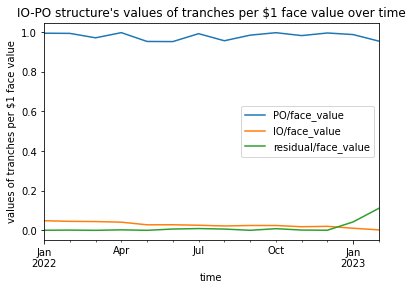

In [33]:
iopo_samples_df[['PO/face_value', 'IO/face_value', 'residual/face_value', 'bucket']].groupby(['bucket']).mean().plot()
plt.xlabel('time')
plt.ylabel('values of tranches per $1 face value')
plt.title("IO-PO structure's values of tranches per $1 face value over time")
plt.savefig("IO-PO structure's values of tranches per $1 face value over time.png")

0      2022-01-01
1      2022-01-01
2      2022-01-01
3      2022-01-01
4      2022-01-01
          ...    
1368   2023-02-01
1369   2023-02-01
1370   2023-02-01
1371   2023-02-01
1372   2023-02-01
Name: bucket, Length: 1373, dtype: datetime64[ns]


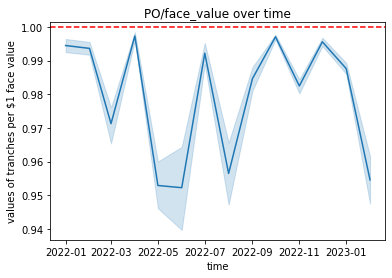

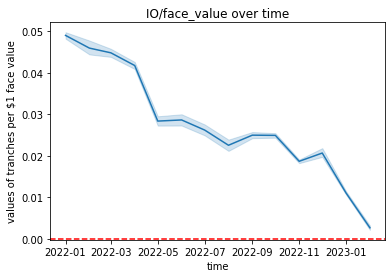

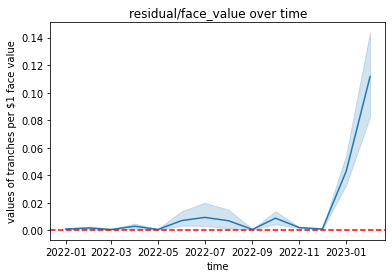

In [34]:
data = iopo_samples_df[['PO/face_value', 'IO/face_value', 'residual/face_value', 'bucket']]
print(data['bucket'])
sns.lineplot(data = data, x="bucket", y="PO/face_value").set(title='PO/face_value over time', xlabel="time", ylabel='values of tranches per $1 face value')
plt.axhline(y=1, color='r', linestyle = 'dashed')
plt.savefig("PO divide face value over time.png")
plt.show()

sns.lineplot(data = data, x="bucket", y="IO/face_value").set(title='IO/face_value over time', xlabel="time", ylabel='values of tranches per $1 face value')
plt.axhline(y=0, color='r', linestyle = 'dashed')
plt.savefig("IO divide face value over time.png")
plt.show()

sns.lineplot(data = data, x="bucket", y="residual/face_value").set(title='residual/face_value over time', xlabel="time", ylabel='values of tranches per $1 face value')
plt.axhline(y=0, color='r', linestyle = 'dashed')
plt.savefig("residual divide face value over time.png")
plt.show()

In [35]:
# calc_tranches_by_principal(sample_pool[71], tranche_principals=None, tranche_aprs=[7, 9])

In [43]:
tranches_sample = [calc_tranches_by_principal(sample_pool[i], tranche_principals=None, tranche_aprs=[5, 7, 9]) for i in range(len(sample_pool))]
tranches_sample_df = pd.DataFrame(tranches_sample)
print(tranches_sample_df)

      principal_1  apr_1  valuation_1  no_default_val_1  principal_2  apr_2  \
0       67.380932      5    67.699120         67.699120    67.380932      7   
1       66.682712      5    66.997603         66.997603    66.682712      7   
2       66.878635      5    67.194451         67.194451    66.878635      7   
3       68.574105      5    68.897927         68.897927    68.574105      7   
4       67.596669      5    67.915875         67.915875    67.596669      7   
...           ...    ...          ...               ...          ...    ...   
1368    68.491697      5    68.815130         68.815130    68.491697      7   
1369    71.648874      5    71.987216         71.987216    71.648874      7   
1370    68.075208      5    68.396675         68.396675    68.075208      7   
1371    66.876470      5    67.192276         67.192276    66.876470      7   
1372    66.776694      5    67.092029         67.092029    66.776694      7   

      valuation_2  no_default_val_2  principal_3  a

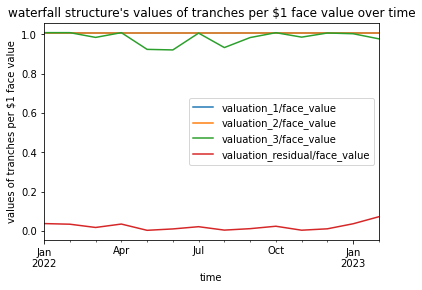

In [44]:
tranches_sample_df[['valuation_1/face_value', 'valuation_2/face_value', 'valuation_3/face_value', 'valuation_residual/face_value', 'bucket']].groupby(['bucket']).mean().plot()
# tranches_sample_df[['valuation_1/face_value', 'valuation_2/face_value', 'valuation_residual/face_value', 'bucket']].groupby(['bucket']).mean().plot()
plt.xlabel('time')
plt.ylabel('values of tranches per $1 face value')
plt.title("waterfall structure's values of tranches per $1 face value over time")
plt.savefig("waterfall structure's values of tranches per $1 face value over time.png")

In [45]:
tranches_sample_df[tranches_sample_df['no_default_val_2']> tranches_sample_df['valuation_2']].describe()
# confirmed residual gets nothing is there is any compromise

,principal_1,apr_1,valuation_1,no_default_val_1,principal_2,apr_2,valuation_2,no_default_val_2,principal_3,apr_3,valuation_3,no_default_val_3,valuation_residual,no_default_valuation_residual,valuation_1/face_value,valuation_2/face_value,valuation_3/face_value,valuation_residual/face_value
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
tranches_sample_df[tranches_sample_df['no_default_val_2'] <= tranches_sample_df['valuation_2']].describe()

,principal_1,apr_1,valuation_1,no_default_val_1,principal_2,apr_2,valuation_2,no_default_val_2,principal_3,apr_3,valuation_3,no_default_val_3,valuation_residual,no_default_valuation_residual,valuation_1/face_value,valuation_2/face_value,valuation_3/face_value,valuation_residual/face_value
count,1373.000000,1373.0,1373.000000,1373.000000,1373.000000,1373.0,1373.000000,1373.000000,1373.000000,1373.0,1373.000000,1373.000000,1373.000000,1373.0,1373.000000,1373.000000,1373.000000,1373.000000
mean,72.057974,5.0,72.398248,72.398248,72.057974,7.0,72.534357,72.534357,72.057974,9.0,71.301833,72.670467,4.779241,0.0,1.004722,1.006611,0.989268,0.021800
std,7.174545,0.0,7.208425,7.208425,7.174545,0.0,7.221977,7.221977,7.174545,0.0,8.199495,7.235529,10.549333,0.0,0.000000,0.000000,0.052425,0.041604
min,66.666862,5.0,66.981678,66.981678,66.666862,7.0,67.107604,67.107604,66.666862,9.0,19.767164,67.233530,0.000000,0.0,1.004722,1.006611,0.295864,0.000000
25%,67.345200,5.0,67.663219,67.663219,67.345200,7.0,67.790427,67.790427,67.345200,9.0,67.513973,67.917634,0.000000,0.0,1.004722,1.006611,1.007693,0.000000
50%,68.956556,5.0,69.282184,69.282184,68.956556,7.0,69.412435,69.412435,68.956556,9.0,68.862061,69.542686,3.263955,0.0,1.004722,1.006611,1.008500,0.014969
75%,74.625643,5.0,74.978042,74.978042,74.625643,7.0,75.119001,75.119001,74.625643,9.0,74.297204,75.259961,5.944663,0.0,1.004722,1.006611,1.008500,0.027910
max,124.813312,5.0,125.402708,125.402708,124.813312,7.0,125.638467,125.638467,124.813312,9.0,125.874225,125.874225,200.654435,0.0,1.004722,1.006611,1.008500,0.701843


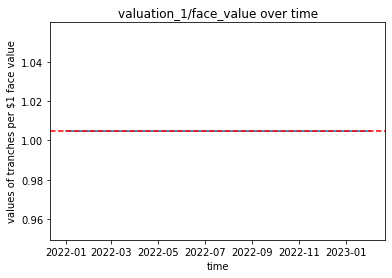

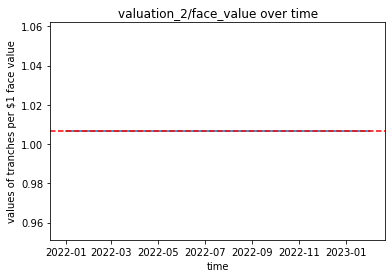

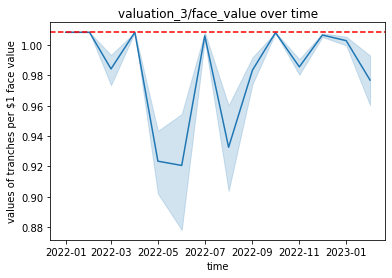

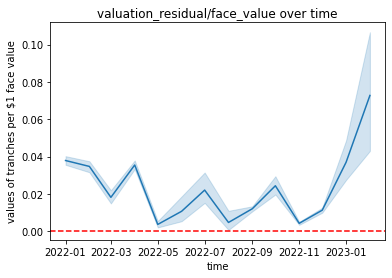

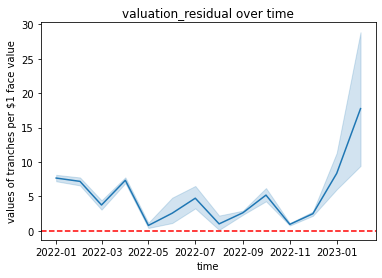

In [49]:
data = tranches_sample_df[['valuation_1/face_value', 'valuation_2/face_value', 'valuation_3/face_value', 'valuation_residual/face_value', 'valuation_residual', 'bucket']]
# data = tranches_sample_df[['valuation_1/face_value', 'valuation_2/face_value', 'valuation_residual/face_value', 'valuation_residual', 'bucket']]

sns.lineplot(data = data, x="bucket", y="valuation_1/face_value").set(title='valuation_1/face_value over time', xlabel="time", ylabel='values of tranches per $1 face value')
plt.axhline(y=1+0.05* 34/360, color='r', linestyle = 'dashed')
plt.savefig("valuation 1 divide face value over time.png")
plt.show()

sns.lineplot(data = data, x="bucket", y="valuation_2/face_value").set(title='valuation_2/face_value over time', xlabel="time", ylabel='values of tranches per $1 face value')
plt.axhline(y=1+0.07* 34/360, color='r', linestyle = 'dashed')
plt.savefig("valuation 2 divide face value over time.png")
plt.show()

sns.lineplot(data = data, x="bucket", y="valuation_3/face_value").set(title='valuation_3/face_value over time', xlabel="time", ylabel='values of tranches per $1 face value')
plt.axhline(y=1+0.09* 34/360, color='r', linestyle = 'dashed')
plt.savefig("valuation 3 divide face value over time.png")
plt.show()
# sns.lineplot(data = data, x="bucket", y="valuation_3/face_value").set(title='valuation_3/face_value over time')
# plt.show()

sns.lineplot(data = data, x="bucket", y="valuation_residual/face_value").set(title='valuation_residual/face_value over time', xlabel="time", ylabel='values of tranches per $1 face value')
plt.axhline(y=0, color='r', linestyle = 'dashed')
plt.savefig("valuation residual divide face value over time.png")
plt.show()

# sns.lineplot(data = data, x="bucket", y="valuation_residual").set(title='valuation_residual over time', xlabel="time", ylabel='values of tranches per $1 face value')
# plt.axhline(y=0, color='r', linestyle = 'dashed')
# plt.savefig("valuation residual over time.png")
# plt.show()

## MC

In [41]:
# generate loans stats


In [42]:
# def mc_prices(short_rate_paths, rate_paths, log_log_params):
#     """calculate the average price of a bond based on simulated rate paths

#     Paramenters
#     -----------
#     short_rate_paths -- the short rate paths simulated, its shape is (10000, 2, 241)
#     rate_paths -- the ten-year-rate paths simulated, its shape is (10000, 2, 241)

#     Output
#     -------
#     mc_estimates -- Monte Carlo price estimates
#     mc_std_errs  -- Monte Carlo standard errors of price estimates
#     """ 

#     bond_prices = price_cfs(tranche_cfs_from_pools(rate_paths, log_log_params), short_rate_paths)
    
#     mc_estimates = dict()
#     mc_std_errs = dict()
#     for tranche in bond_prices:
#         mc_estimates[tranche] = bond_prices[tranche].mean()
#         mc_std_errs[tranche] = bond_prices[tranche].mean(axis=1).std() / bond_prices[tranche].shape[0]**.5

#     return mc_estimates, mc_std_errs

# def compute_monte_carlo_stats(log_log_params, num_steps=236, num_paths=10000, rate_maturity=10, bump_size=.0001):
#     """
#     Compute Monte Carlo estimates, standard errors, duration, convexity, and oas of all tranches.

#     Parameters
#     ----------
#     num_steps     -- number of discrete time steps to simulate
#     num_paths     -- number of Monte Carlo paths to generate
#     rate_maturity -- maturity of the rates, in years
#     bump_size     -- discrete bump to the short rate at the beginning of the simulation for computing duration/convexity
#     """
#     short_rate_paths, rate_paths = hull_white.mc_antithetic_rates(num_steps, num_paths, rate_maturity)
#     short_rate_paths_bumped_up, rate_paths_bumped_up = hull_white.mc_antithetic_rates(num_steps, num_paths, rate_maturity, bump_size)
#     short_rate_paths_bumped_down, rate_paths_bumped_down = hull_white.mc_antithetic_rates(num_steps, num_paths, rate_maturity, -bump_size)

#     mc_estimates, mc_std_errs = mc_prices(short_rate_paths, rate_paths, log_log_params)
#     mc_estimates_bumped_up, _ = mc_prices(short_rate_paths_bumped_up, rate_paths_bumped_up, log_log_params)
#     mc_estimates_bumped_down, _ = mc_prices(short_rate_paths_bumped_down, rate_paths_bumped_down, log_log_params)
#     duration = {
#         tranche: (mc_estimates_bumped_down[tranche] - mc_estimates_bumped_up[tranche]) / (mc_estimates[tranche] * 2 * bump_size)
#         for tranche in mc_estimates
#     }
#     convexity = {
#         tranche: (mc_estimates_bumped_down[tranche] + mc_estimates_bumped_up[tranche] - 2 * mc_estimates[tranche]) / (mc_estimates[tranche] * bump_size**2)
#         for tranche in mc_estimates
#     }

#     cfs = tranche_cfs_from_pools(rate_paths, log_log_params)
#     oas = {
#         tranche: fsolve(lambda adj: price_cfs(cfs, short_rate_paths + adj)[tranche].mean() - balances[tranche], 0)[0]
#         for tranche in balances
#     }
#     return mc_estimates, mc_std_errs, duration, convexity, oas